<a href="https://colab.research.google.com/github/ghaith-Bilal/advancedMachineLearning/blob/main/exercises/logisticRegression/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

In [28]:
#STEP 1: DATA READING AND UNDERSTANDING
df = pd.read_csv("/content/drive/MyDrive/assignmentForAML/logisticRegression/images_analyzed_productivity1.csv")
print(df.head())

   User  Time  Coffee  Age  Images_Analyzed Productivity
0     1     8       0   23               20         Good
1     1    13       0   23               14          Bad
2     1    17       0   23               18         Good
3     1    22       0   23               15          Bad
4     1     8       2   23               22         Good


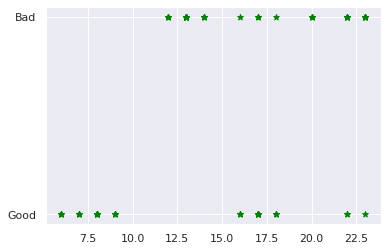

In [29]:
# plt.scatter(df.Age, df.Productivity, marker='+', color='red')
plt.scatter(df.Time, df.Productivity, marker='*', color='green')
# plt.scatter(df.Coffee, df.Productivity, marker='#', color='blue')

In [30]:
#PLot productivity values to see the split between Good and Bad
sizes = df['Productivity'].value_counts(sort = 1)
print(sizes)

Bad     42
Good    38
Name: Productivity, dtype: int64


([<matplotlib.patches.Wedge at 0x7f323102a410>,
 [Text(-0.08630492316306847, 1.096609073570804, ''),
  Text(0.08630482049111692, -1.0966090816512493, '')],
 [Text(-0.04707541263440097, 0.598150403765893, '52.5%'),
  Text(0.04707535663151831, -0.5981504081734086, '47.5%')])

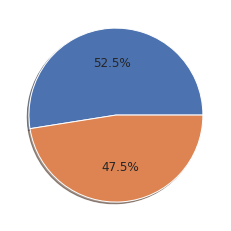

In [31]:
#Good to know so we know the proportion of each label
plt.pie(sizes, shadow=True, autopct='%1.1f%%')

In [32]:
#STEP 3: Handle missing values, if needed
#Drops all rows with at least one null value. 
df = df.dropna()  

In [33]:
#Convert non-numeric to numeric
df.Productivity[df.Productivity == 'Good'] = 1
df.Productivity[df.Productivity == 'Bad'] = 2
print(df.head())

   User  Time  Coffee  Age  Images_Analyzed Productivity
0     1     8       0   23               20            1
1     1    13       0   23               14            2
2     1    17       0   23               18            1
3     1    22       0   23               15            2
4     1     8       2   23               22            1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
#Y is the data with dependent
Y = df["Productivity"].values 

In [35]:
#Convert Y to int
Y=Y.astype('int')

In [36]:
#X is data with independent variables, everything except Productivity column
X = df.drop(labels = ["Productivity"], axis=1) 
print('features:\n',X.head()) 

features:
    User  Time  Coffee  Age  Images_Analyzed
0     1     8       0   23               20
1     1    13       0   23               14
2     1    17       0   23               18
3     1    22       0   23               15
4     1     8       2   23               22


In [37]:
#SPLIT THE DATA into TRAIN AND TEST data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)

In [38]:
#Create an instance of the model.
model = LogisticRegression()
# Train the model using training data
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
#TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE
prediction_test = model.predict(X_test)
#Print the prediction accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))


Accuracy =  0.90625
